# Ward Hierarchical

In [17]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
# import pandas as pd
import matplotlib.pyplot as plt
# import pylab as pl
import re
from numpy import array

# Preprocessing

In [5]:
with open("C://Dr. Bhandarkar- Directed Study//nounVectorsFastext.txt",'r') as myfile:
    tempdata=myfile.read()
opbrack=[]
closebrack=[]
names=[]
for i in range(0,tempdata.__len__()):
    if tempdata[i]=='[':
        opbrack.append(i)
    if tempdata[i]==']':
        closebrack.append(i)
names=[]
str=tempdata.split(']')
for i in range(0,len(str)-1):
    a = re.findall(r'\w+', str[i])
    names.append(a[0])
    
count=0
data=[]
while count<opbrack.__len__():
    data.append(tempdata[opbrack[count]+1:closebrack[count]])
    count=count+1
count=0

while count<data.__len__():
    counter=0
    temp=data[count]
    while counter<data[count].__len__():
        if temp[counter]==" ":
            temp=temp.replace(temp[counter],"")
        data[count]=temp
        counter=counter+1
    count=count+1
count=0
while count<data.__len__():
    counter=0
    temp=data[count]
    while counter<data[count].__len__():
        if temp[counter]==",":
            temp=temp.replace(temp[counter]," ")
        data[count]=temp
        counter=counter+1
    count=count+1
count=0
X=[]
while count<data.__len__():
    temp=data[count]
    floats = [float(x) for x in temp.split()]
    X.append(floats)
    count=count+1
X=np.array(X)

# Applying the model

In [11]:
cluster = AgglomerativeClustering(n_clusters=11, affinity="euclidean", linkage="ward").fit(X)

# Predicting the Labels

In [12]:
labels=cluster.labels_
# print(np.unique(labels).shape)
clust=[]
clusternames=[]
listofl=[]
for i in range(0,11):
    arr=list(np.where(labels==i))
    clust.append(arr)

for i in range(0,len(clust)):
    temp=clust[i]
    for k in range(0,len(clust[i])):
        clusternames=[]
        for l in range(0,len(clust[i][k])):
            clusternames.append(names[clust[i][k][l]])
        listofl.append(clusternames)

# Writing the results to a File 

In [13]:
# with open("WardHierarachical.txt",'a') as f:
#     f.write("RESULTS OF Ward Hierarchical"+"\n")
#     f.write("\n")

In [14]:
# with open("WardHierarachical.txt",'a') as f:
#     f.write("Number of clusters = 17 "+"\n")
#     f.write("\n")

In [15]:
# with open("WardHierarachical.txt",'a') as f:
#     for i in listofl:
#         f.write("[")
#         for j in i:
#             f.write(j+",")
#         f.write("]"+"\n"+"\n")

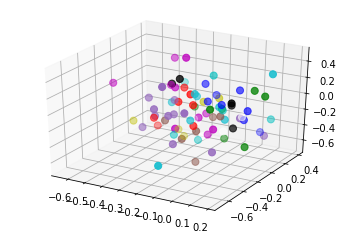

In [18]:
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d
# labels = kmeans.labels_ 
Label_Map = {0:'r',1:'b',2:'g',3:'tab:purple',4:'c',5:'m',6:'y',7:'k',8:'w',9:'tab:brown',10:'tab:cyan'}
label_color = [Label_Map[l] for l in labels]
ax=plt.axes(projection ='3d')
ax.scatter(X[:,3],X[:,0],X[:,2] , c=label_color, s=50)

plt.show()